# Cross sections

In [33]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
drive_file={
    '8xsquarkcs.csv':'1vBeXxa5rJjz7EFq1PgITfGCYJN5S8qVNRkXL8Nk452E',
    'triplet_fermion_cross_section_8TeV':'1DIHeB5xre_EnHDi7UBb25g6WHr1g7cpp7GtU67xJnyk',
    'doublet_fermion_cross_section_8TeV':'1YsekdtaDC-IH0ddZD7a93necEsD4cV8tEvC-8RCWUGc',
    'stau_cross_section_8TeV':'1A6DmOk_Rd_SCGLN6EuSalUCF6ZeEGmmEDNrt77haGoo'
}


In [5]:

def google_spreadsheet(key):    
    import io
    import pandas as pd
    import requests
    url='https://docs.google.com/spreadsheets/d/%s/gviz/tq?tqx=out:csv' %key
    r=requests.get(url)
    if r.status_code==200:
        csv_file=io.StringIO(r.text) # or directly  with: urllib.request.urlopen(url)
        df=pd.read_csv( csv_file,keep_default_na=False)
        return df

In [20]:
cssq=google_spreadsheet(drive_file['8xsquarkcs.csv'])
csch3=google_spreadsheet(drive_file['triplet_fermion_cross_section_8TeV'])
csch2=google_spreadsheet(drive_file['doublet_fermion_cross_section_8TeV'])
csst=google_spreadsheet(drive_file['stau_cross_section_8TeV'])

In [43]:
csch2=csch2.rename_axis({'mcha1':'M','cs_NLO':'cs'},axis='columns')

In [21]:
cssq=cssq.rename_axis({'DM mass':'M','Nominal (pb) ± Uncertainty':'cs'},axis='columns')

In [27]:
cssq['M']=cssq.M.str.split().str[0].astype(float)

In [31]:
cssq['cs']=cssq.cs.str.split().str[0].astype(float)

(0.0001, 200)

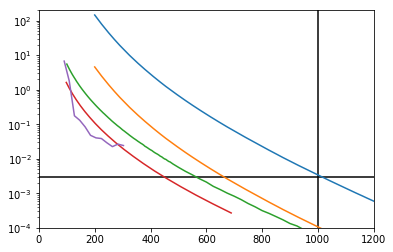

In [60]:
plt.semilogy(cssq.M,cssq.cs*0.8)
plt.semilogy(cssq.M,0.25*cssq.cs/10.)
plt.semilogy(csch3.M,csch3.cs)
plt.semilogy(csch2.M,csch2.cs)
plt.semilogy(csst.M,csst.cs)
plt.hlines(3.E-3,0,2000)
plt.vlines(1000,1E-4,500)
plt.xlim(0,1200)
plt.ylim(1E-4,200)